# ___

# [ Machine Learning in Geosciences]


---

Lecturer: *Lukas Brodsky lukas.brodsky@natur.cuni.cz*

**Department of Applied Geoinformatics and Carthography, Charles University** 

___

## GeoPandas

This notebook introduces how to work with vectors in in Python using GeoPandas https://geopandas.org library. GeoPandas extends the popular data science library pandas by adding support for geospatial data.


It covers: 

    
* 1. Reading and writing vector data into GeoDataFrame and file system 

* 2. Simple accessors functions 

* 3. Plotting maps

* 4. Geometry constructors 


The core data structure in GeoPandas is the `geopandas.GeoDataFrame`, a subclass of `pandas.DataFrame`, that can store `geometry` columns and perform spatial operations. The `geopandas.GeoSeries`, a subclass of `pandas.Series`, handles the `geometries`. 

You can have as many columns with geometries as you wish; there’s no limit typical for desktop GIS software.
 
 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://geopandas.org/en/stable/_images/dataframe.svg")

Each `GeoSeries` can contain any `geometry type` (you can even mix them within a single array) and has a `GeoSeries.crs` attribute, which stores information about the projection (CRS stands for Coordinate Reference System). Therefore, each `GeoSeries` in a `GeoDataFrame` can be in a different projection, allowing you to have, for example, multiple versions (different projections) of the same `geometry`.

Only one `GeoSeries` in a `GeoDataFrae` is considered the `active geometry`, which means that all geometric operations applied to a `GeoDataFrame` operate on this active column.

## Reading and writing files

In [2]:
import os 
import geopandas
import pandas as pd

`geopandas.read_file()`

In [3]:
# Reading
# # CHANGE TO YOUR PATH!!!
path = r'C:\Users\uzivatel\Documents\GitHub\Machine_learning\10_11_LAB_GeoAI_GeoPython\GeoPython'
filename = 'polygons.shp'
path_fn = os.path.join(path, filename)
gdf = geopandas.read_file(path_fn)

In [4]:
gdf

,label,note,geometry
0,1,glacier,"POLYGON ((630019.737 7747367.105, 630896.053 7..."
1,2,debries,"POLYGON ((631944.079 7740883.553, 632169.079 7..."
2,3,rock,"POLYGON ((625330.263 7741517.105, 625780.263 7..."


In [5]:
gdf.head()

,label,note,geometry
0,1,glacier,"POLYGON ((630019.737 7747367.105, 630896.053 7..."
1,2,debries,"POLYGON ((631944.079 7740883.553, 632169.079 7..."
2,3,rock,"POLYGON ((625330.263 7741517.105, 625780.263 7..."


In [6]:
gdf['label2'] = gdf['label'] + 5

In [7]:
gdf['label2']

0    6
1    7
2    8
Name: label2, dtype: int64

In [8]:
gdf.iloc[1]['note'] = 'debris'

C:\Users\uzivatel\AppData\Local\Temp\ipykernel_6124\3010325453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf.iloc[1]['note'] = 'debris'


In [9]:
gdf

,label,note,geometry,label2
0,1,glacier,"POLYGON ((630019.737 7747367.105, 630896.053 7...",6
1,2,debries,"POLYGON ((631944.079 7740883.553, 632169.079 7...",7
2,3,rock,"POLYGON ((625330.263 7741517.105, 625780.263 7...",8


`GeoDataFrame.to_file()`

The default file format is Shapefile, but you can specify your own with the driver keyword.

In [10]:
# writing
# # CHANGE TO YOUR PATH!!!
# path_lfs = '/Users/lukas/Work/prfuk/vyuka/erasmus_ml_geography/data/'
gdf.to_file(os.path.join(path, 'my_polygons.geojson'), driver="GeoJSON")

## Simple accessors and methods

### Measuring area
To measure the area of each polygon (or MultiPolygon in this specific case), access the GeoDataFrame.area attribute, which returns a pandas.Series. Note that `GeoDataFrame.area` is just `GeoSeries.area` applied to the active `geometry` column.

In [11]:
# add new attribute area
gdf["area"] = gdf.area / 1000000 # km2 
gdf["area"].head()

0    3.099765
1    0.151314
2    0.676496
Name: area, dtype: float64

In [12]:
gdf

,label,note,geometry,label2,area
0,1,glacier,"POLYGON ((630019.737 7747367.105, 630896.053 7...",6,3.099765
1,2,debries,"POLYGON ((631944.079 7740883.553, 632169.079 7...",7,0.151314
2,3,rock,"POLYGON ((625330.263 7741517.105, 625780.263 7...",8,0.676496


### Getting polygon boundary and centroid

In [13]:
gdf['boundary'] = gdf.boundary
gdf['boundary'] 

0    LINESTRING (630019.737 7747367.105, 630896.053...
1    LINESTRING (631944.079 7740883.553, 632169.079...
2    LINESTRING (625330.263 7741517.105, 625780.263...
Name: boundary, dtype: geometry

In [14]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

0    POINT (630375.400 7746334.905)
1    POINT (631925.346 7740645.252)
2    POINT (625216.784 7741106.275)
Name: centroid, dtype: geometry

In [15]:
gdf

,label,note,geometry,label2,area,boundary,centroid
0,1,glacier,"POLYGON ((630019.737 7747367.105, 630896.053 7...",6,3.099765,"LINESTRING (630019.737 7747367.105, 630896.053...",POINT (630375.400 7746334.905)
1,2,debries,"POLYGON ((631944.079 7740883.553, 632169.079 7...",7,0.151314,"LINESTRING (631944.079 7740883.553, 632169.079...",POINT (631925.346 7740645.252)
2,3,rock,"POLYGON ((625330.263 7741517.105, 625780.263 7...",8,0.676496,"LINESTRING (625330.263 7741517.105, 625780.263...",POINT (625216.784 7741106.275)


In [16]:
gdf['centroid'].iloc[0].y

7746334.904851707

In [17]:
# coordinates of the first centroid
gdf['centroid'].iloc[0].x, gdf['centroid'].iloc[0].y

(630375.400022858, 7746334.904851707)

### Measuring distance

In [18]:
first_point = gdf['centroid'].iloc[0]
first_point.x

630375.400022858

In [19]:
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']

0       0.000000
1    5896.989221
2    7345.058814
Name: distance, dtype: float64

## Plotting maps

<Axes: >

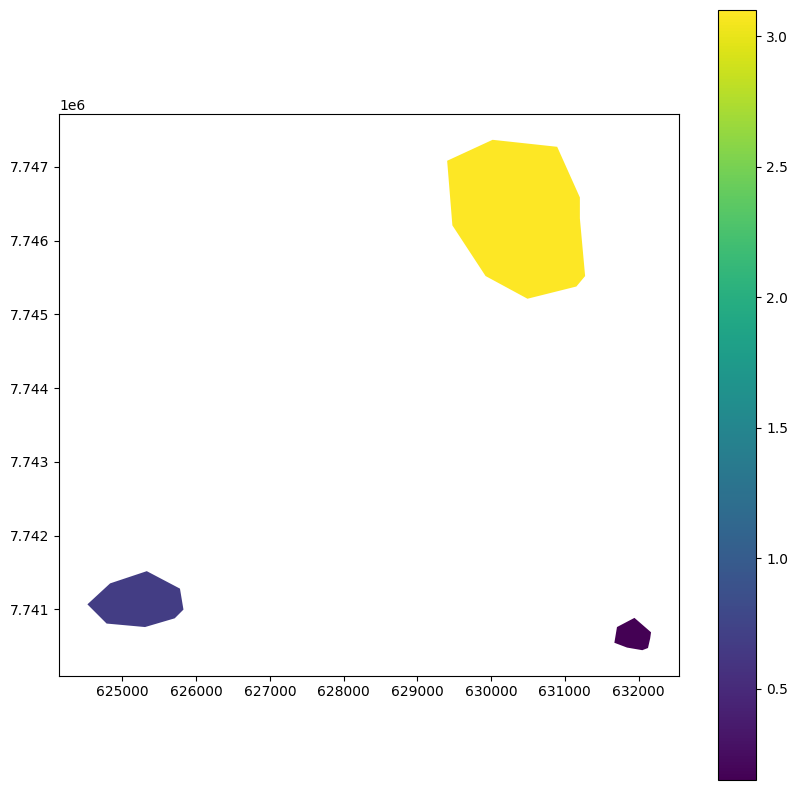

In [20]:
gdf.plot("area", legend=True, figsize=(10,10))

## Geometry creation (constructor)

In [21]:
gdf.head()

,label,note,geometry,label2,area,boundary,centroid,distance
0,1,glacier,"POLYGON ((630019.737 7747367.105, 630896.053 7...",6,3.099765,"LINESTRING (630019.737 7747367.105, 630896.053...",POINT (630375.400 7746334.905),0.000000
1,2,debries,"POLYGON ((631944.079 7740883.553, 632169.079 7...",7,0.151314,"LINESTRING (631944.079 7740883.553, 632169.079...",POINT (631925.346 7740645.252),5896.989221
2,3,rock,"POLYGON ((625330.263 7741517.105, 625780.263 7...",8,0.676496,"LINESTRING (625330.263 7741517.105, 625780.263...",POINT (625216.784 7741106.275),7345.058814


In [22]:
# prepare ne df with coordinates
x = gdf['centroid'].x
y = gdf['centroid'].y
xy=pd.concat([x,y],axis=1)
xy.columns = ['x', 'y']

In [23]:
xy

,x,y
0,630375.400023,7.746335e+06
1,631925.345867,7.740645e+06
2,625216.784499,7.741106e+06


In [24]:
xy_geometry = geopandas.GeoDataFrame(
                xy, geometry=geopandas.points_from_xy(xy['x'], xy['y']))
xy_geometry.head()

,x,y,geometry
0,630375.400023,7.746335e+06,POINT (630375.400 7746334.905)
1,631925.345867,7.740645e+06,POINT (631925.346 7740645.252)
2,625216.784499,7.741106e+06,POINT (625216.784 7741106.275)


#### Buffer

In [25]:
xy_geometry["buffer"] = xy_geometry.buffer(1000)
xy_geometry.head()

,x,y,geometry,buffer
0,630375.400023,7.746335e+06,POINT (630375.400 7746334.905),"POLYGON ((631375.400 7746334.905, 631370.585 7..."
1,631925.345867,7.740645e+06,POINT (631925.346 7740645.252),"POLYGON ((632925.346 7740645.252, 632920.531 7..."
2,625216.784499,7.741106e+06,POINT (625216.784 7741106.275),"POLYGON ((626216.784 7741106.275, 626211.969 7..."


<Axes: >

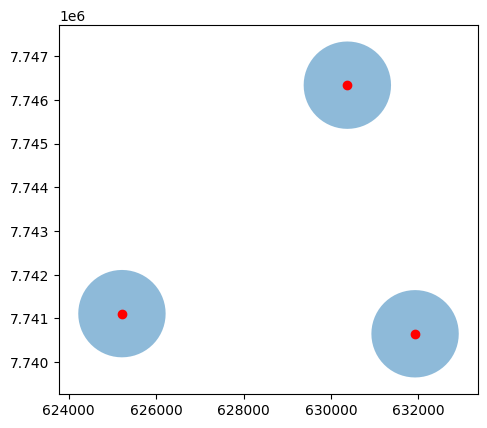

In [26]:
ax = xy_geometry["buffer"].plot(alpha=.5)
xy_geometry["geometry"].plot(ax=ax, color="red") 

In [ ]:
# and so on ... 